In [1]:
# Import required modules
import matplotlib.pyplot as plt
import pandas as pd
import squarify

In [2]:
df = pd.read_csv('./data/expenditures.txt', sep='\t', lineterminator='\r')

In [3]:
df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [4]:
df1 = df.groupby('category', as_index=False)['expenditure'].agg('sum')

In [5]:
#df1.sort_values(by=['expenditure'], ascending=False, inplace=True)

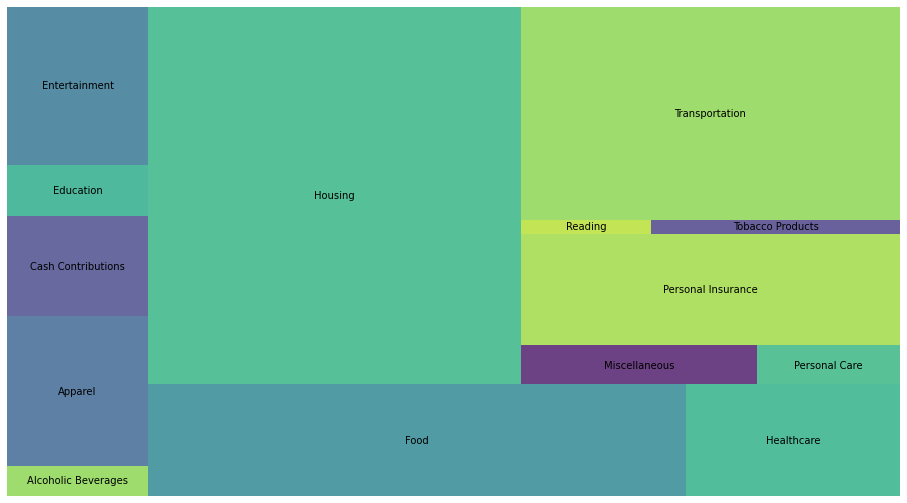

In [78]:
# Tree map
from matplotlib import style
import squarify  # for tree maps  

fig, ax = plt.subplots(figsize=(16,9))

squarify.plot(sizes=df1['expenditure'], label=df1['category'], alpha=.8 )
style.use('ggplot')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Expenditure')

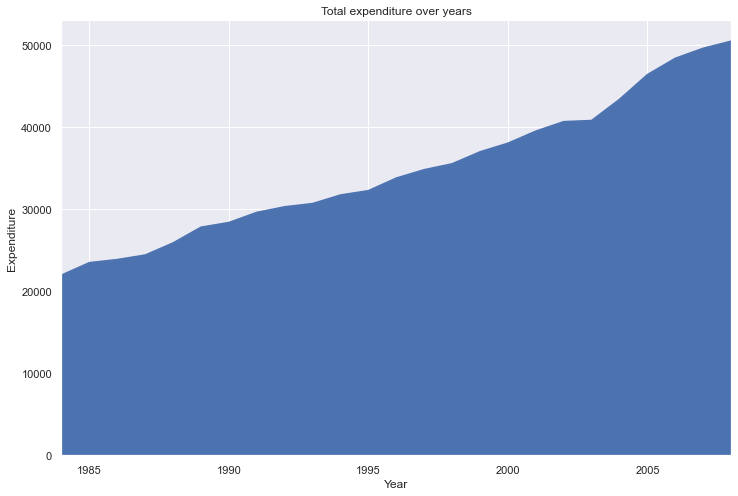

In [35]:
# Area plot
df2 = df.groupby('year', as_index=True)['expenditure'].agg('sum')
fig, ax = plt.subplots(figsize=(12,8))
df2.plot.area(y='expenditure', title='Total expenditure over years', label='Year')
plt.xlabel("Year")
plt.ylabel("Expenditure")


In [39]:
df3 = df.groupby(['year','category'])['expenditure'].agg('sum')
df4=pd.DataFrame(df3)
df4 = df4.reset_index(level=['year','category'])

In [40]:
df5 = df4.pivot_table(index="year", columns="category", values='expenditure')

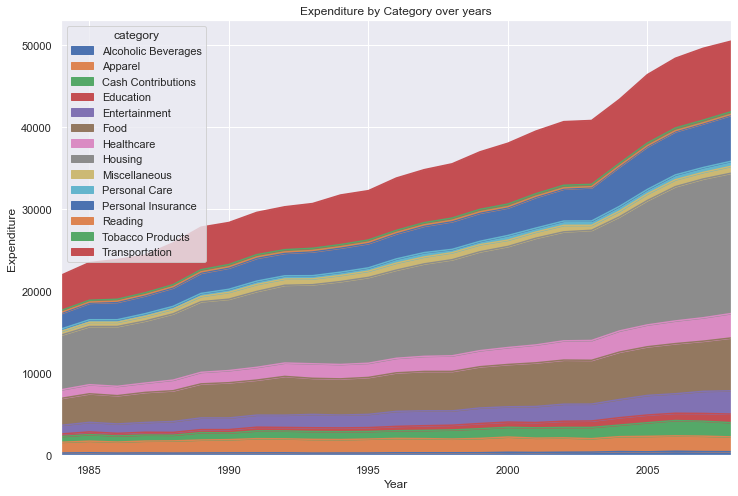

In [41]:
# Draw an area plot over the years by category

ax = df5.plot.area(stacked=True,figsize=(12,8))
plt.ylabel('Expenditure')
plt.xlabel('Year')
plt.title('Expenditure by Category over years')
plt.show(block=True)

In [83]:
# Sum of expenditure by year
df6 = df4.groupby('year', as_index=False)['expenditure'].agg('sum')

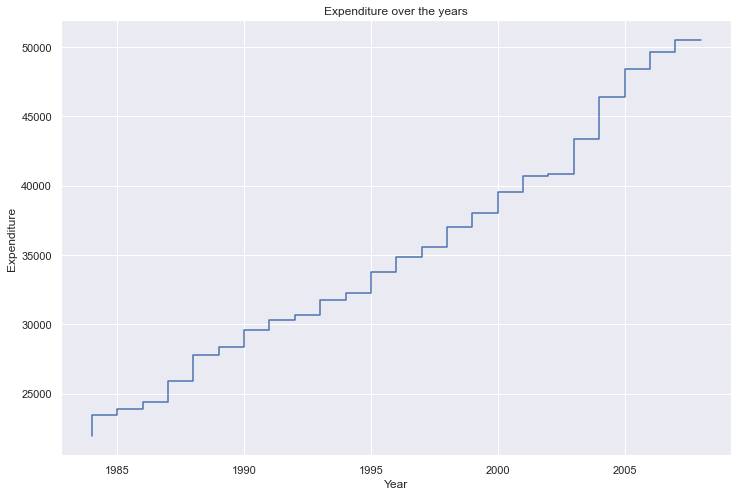

In [84]:
# Step plot
ax, fig = plt.subplots(figsize=(12,8))
plt.step(df6['year'], df6['expenditure'], label='expenditure')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure over the years')
plt.show()